In [85]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn import preprocessing
# Importamos librerias de PCA y silhouette_score
from sklearn.decomposition import PCA
from  sklearn.metrics import silhouette_score
# Importamos librerias de Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering

In [86]:
ps = pd.read_csv(r'C:/Users/Usuario/Google Drive/UTN/Ciencia de datos/Trabajo práctico/precios-en-surtidor-resolucin-3142016.csv')

In [87]:
ps.head()

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
0,2017-03,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,2,Diurno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
1,2017-03,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,3,Nocturno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
2,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,2,Diurno,14.96,2017-04-06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
3,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,3,Nocturno,14.96,2017-04-06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
4,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,21,Gas Oil Grado 3,2,Diurno,16.75,2017-04-06 20:52:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."


In [88]:
ps = ps.drop(ps.loc[ps['region'].isnull()].index) # eliminamos los nulos considerando que los datos son categóricos y dificil de reemplazar

In [89]:
# vemos cuales son las regiones y los productos
regiones = len(ps['region'].unique())
print("\n", ps['region'].unique())
naftas = len(ps['producto'].unique())
print("\n", ps['producto'].unique())


 ['PAMPEANA' 'PATAGONIA' 'CUYO' 'CENTRO' 'NEA' 'NOA']

 ['GNC' 'Gas Oil Grado 2' 'Gas Oil Grado 3'
 'Nafta (premium) de más de 95 Ron' 'Nafta (súper) entre 92 y 95 Ron']


In [90]:
import datetime as dt
ps.indice_tiempo = pd.to_datetime(ps.indice_tiempo)
ps['year'] = ps.indice_tiempo.dt.year

In [91]:
ps.head(5)

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson,year
0,2017-03-01,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,2,Diurno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34....",2017
1,2017-03-01,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,3,Nocturno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34....",2017
2,2017-04-01,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,2,Diurno,14.96,2017-04-06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44....",2017
3,2017-04-01,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,3,Nocturno,14.96,2017-04-06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44....",2017
4,2017-04-01,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,21,Gas Oil Grado 3,2,Diurno,16.75,2017-04-06 20:52:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44....",2017


In [207]:
# Filtramos las cotizaciones de GN del añ0 2017
gnc_2017 = ps[(ps['producto'] == 'GNC')]
gnc_2017.head(5)
gnc_2017 = gnc_2017[(gnc_2017['year'] == 2017)]
gnc_2017.head(5)

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson,year
0,2017-03-01,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,2,Diurno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34....",2017
1,2017-03-01,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,3,Nocturno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34....",2017
388,2017-03-01,6162,30-70901572-5,AFG DISTRIBUCION S.R.L.,RUTA DE LA TRADICION 8185,9 DE ABRIL,BUENOS AIRES,PAMPEANA,6,GNC,2,Diurno,8.79,2017-03-31 10:11:00,24,OIL COMBUSTIBLES S.A.,-34.739545,-58.496497,"{""type"":""Point"",""coordinates"":[-58.496497,-34....",2017
389,2017-03-01,6162,30-70901572-5,AFG DISTRIBUCION S.R.L.,RUTA DE LA TRADICION 8185,9 DE ABRIL,BUENOS AIRES,PAMPEANA,6,GNC,3,Nocturno,8.79,2017-03-31 10:11:00,24,OIL COMBUSTIBLES S.A.,-34.739545,-58.496497,"{""type"":""Point"",""coordinates"":[-58.496497,-34....",2017
1010,2017-04-01,3612,30-68260383-2,ALGARROBITOS S.A.,CRUCE RUTA PROVINCIAL 6 Y 10,HERNANDO,CORDOBA,CENTRO,6,GNC,2,Diurno,12.99,2017-04-06 15:09:00,1,BLANCA,-32.442740,-63.713770,"{""type"":""Point"",""coordinates"":[-63.71377,-32.4...",2017


In [95]:
# Filtramos las cotizaciones de GNC del añ0 2018
gnc_2018 = ps[(ps['producto'] == 'GNC')]
gnc_2018 = gnc_2018[(gnc_2018['year'] == 2018)]
gnc_2018.head(5)

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson,year
274,2018-11-01,2638,30-52648492-0,ACTIS S.A.,AV.SAN MARTIN 405,GRAL. CABRERA,CORDOBA,CENTRO,6,GNC,2,Diurno,22.19,2018-11-08 09:19:00,2,YPF,-32.81399,-63.87937,"{""type"":""Point"",""coordinates"":[-63.87937,-32.8...",2018
275,2018-11-01,2638,30-52648492-0,ACTIS S.A.,AV.SAN MARTIN 405,GRAL. CABRERA,CORDOBA,CENTRO,6,GNC,3,Nocturno,22.19,2018-11-08 09:19:00,2,YPF,-32.81399,-63.87937,"{""type"":""Point"",""coordinates"":[-63.87937,-32.8...",2018
378,2018-11-01,4324,30-61772382-0,AFAMIA SA,AV ROCA 2998,SAN MIGUEL DE TUCUMAN,TUCUMAN,CUYO,6,GNC,2,Diurno,21.89,2018-11-06 06:00:00,8,REFINOR,-26.83588,-65.24645,"{""type"":""Point"",""coordinates"":[-65.24645,-26.8...",2018
379,2018-11-01,4324,30-61772382-0,AFAMIA SA,AV ROCA 2998,SAN MIGUEL DE TUCUMAN,TUCUMAN,CUYO,6,GNC,3,Nocturno,21.89,2018-11-06 06:00:00,8,REFINOR,-26.83588,-65.24645,"{""type"":""Point"",""coordinates"":[-65.24645,-26.8...",2018
884,2018-04-01,985,30-52755255-5,ALBERTO M. SURBALLE SRL,SAN ISIDRO 902,RIVADAVIA,MENDOZA,CUYO,6,GNC,2,Diurno,15.89,2018-04-11 17:54:00,2,YPF,-33.19211,-68.46315,"{""type"":""Point"",""coordinates"":[-68.46315,-33.1...",2018


In [96]:
# Filtramos las cotizaciones de GNC del añ0 2019
gnc_2019 = ps[(ps['producto'] == 'GNC')]
gnc_2019 = gnc_2019[(gnc_2019['year'] == 2019)]
gnc_2019.head(5)

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson,year
14,2019-09-01,1284,30-56342987-5,25 DE MAYO SRL (EESS),25 DE MAYO 675,VILLA MERCEDES,SAN LUIS,CUYO,6,GNC,2,Diurno,25.98,2019-09-20 09:38:00,2,YPF,-33.679540,-65.469880,"{""type"":""Point"",""coordinates"":[-65.46988,-33.6...",2019
15,2019-09-01,1284,30-56342987-5,25 DE MAYO SRL (EESS),25 DE MAYO 675,VILLA MERCEDES,SAN LUIS,CUYO,6,GNC,3,Nocturno,25.98,2019-09-20 09:38:00,2,YPF,-33.679540,-65.469880,"{""type"":""Point"",""coordinates"":[-65.46988,-33.6...",2019
32,2019-09-01,2530,30-70833125-9,4 GNC S.A.,LA QUEMADA 2189,FIRMAT,SANTA FE,CENTRO,6,GNC,2,Diurno,24.97,2019-09-21 06:00:00,1,BLANCA,-33.463870,-61.496510,"{""type"":""Point"",""coordinates"":[-61.49651,-33.4...",2019
33,2019-09-01,2530,30-70833125-9,4 GNC S.A.,LA QUEMADA 2189,FIRMAT,SANTA FE,CENTRO,6,GNC,3,Nocturno,24.97,2019-09-21 06:00:00,1,BLANCA,-33.463870,-61.496510,"{""type"":""Point"",""coordinates"":[-61.49651,-33.4...",2019
48,2019-09-01,2842,30-70841705-6,72 GAS S.A.,CALLE 72 E/ 10 Y11,LA PLATA,BUENOS AIRES,PAMPEANA,6,GNC,2,Diurno,23.99,2019-09-20 14:00:00,7,SOL PETROLEO,-34.934754,-57.930919,"{""type"":""Point"",""coordinates"":[-57.930919,-34....",2019


In [97]:
# Filtramos las cotizaciones de Nafta super del añ0 2017
naftasuper_2017 = ps[(ps['producto'] == 'Nafta (súper) entre 92 y 95 Ron')]
naftasuper_2017 = naftasuper_2017[(naftasuper_2017['year'] == 2017)]
naftasuper_2017.head(5)

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson,year
8,2017-04-01,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,14.87,2017-04-06 20:55:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44....",2017
9,2017-04-01,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,14.87,2017-04-06 20:55:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44....",2017
150,2017-12-01,348,30-60588371-7,ABELLA Y ALONSO S.R.L.,MORENO 1701,VILLA BALLESTER,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,25.49,2017-12-06 11:36:00,24,OIL COMBUSTIBLES S.A.,-34.533377,-58.557665,"{""type"":""Point"",""coordinates"":[-58.557665,-34....",2017
151,2017-12-01,348,30-60588371-7,ABELLA Y ALONSO S.R.L.,MORENO 1701,VILLA BALLESTER,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,25.49,2017-12-06 11:36:00,24,OIL COMBUSTIBLES S.A.,-34.533377,-58.557665,"{""type"":""Point"",""coordinates"":[-58.557665,-34....",2017
262,2017-03-01,6848,33-65361003-9,ACOTUR S.A.,RUTA 7 KM. 1145 USPALLATA,USPALLATA,MENDOZA,CUYO,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,19.99,2017-03-27 18:18:00,1,BLANCA,-32.621279,-69.348342,"{""type"":""Point"",""coordinates"":[-69.348342,-32....",2017


In [98]:
# Filtramos las cotizaciones de Nafta super del añ0 2018

naftasuper_2018 = ps[(ps['producto'] == 'Nafta (súper) entre 92 y 95 Ron')]
naftasuper_2018 = naftasuper_2018[(naftasuper_2018['year'] == 2018)]
naftasuper_2018.head(5)

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson,year
96,2018-06-01,1382,20-15089788-3,ABALSAMO EGIDIO,TRIUNVIRATO 3797,SAN MARTIN,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,32.00,2018-06-28 15:00:00,1,BLANCA,-34.58127,-58.57441,"{""type"":""Point"",""coordinates"":[-58.57441,-34.5...",2018
97,2018-06-01,1382,20-15089788-3,ABALSAMO EGIDIO,TRIUNVIRATO 3797,SAN MARTIN,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,32.00,2018-06-28 15:00:00,1,BLANCA,-34.58127,-58.57441,"{""type"":""Point"",""coordinates"":[-58.57441,-34.5...",2018
590,2018-02-01,7775,30-71149864-4,AGROCOMBUSTIBLES SAN FAUSTINO S.R.L,calle 30 N° 789,HUANGUELEN,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,29.48,2018-02-17 15:00:00,1,BLANCA,-37.06082,-61.93658,"{""type"":""Point"",""coordinates"":[-61.93658,-37.0...",2018
591,2018-02-01,7775,30-71149864-4,AGROCOMBUSTIBLES SAN FAUSTINO S.R.L,calle 30 N° 789,HUANGUELEN,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,29.48,2018-02-17 15:00:00,1,BLANCA,-37.06082,-61.93658,"{""type"":""Point"",""coordinates"":[-61.93658,-37.0...",2018
680,2018-07-01,5938,30-70912606-3,AGRORUTA S.A.,RUTA 36 KM.155,PIPINAS,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,29.59,2018-07-07 14:00:00,24,OIL COMBUSTIBLES S.A.,-35.53098,-57.32367,"{""type"":""Point"",""coordinates"":[-57.32367,-35.5...",2018


In [99]:
# Filtramos las cotizaciones de Nafta super del añ0 2019

naftasuper_2019 = ps[(ps['producto'] == 'Nafta (súper) entre 92 y 95 Ron')]
naftasuper_2019 = naftasuper_2019[(naftasuper_2019['year'] == 2019)]

In [103]:
# Filtramos las cotizaciones de Gasoil premium del añ0 2017

gasoil_premium_2017 = ps[(ps['producto'] == 'Gas Oil Grado 3')]
gasoil_premium_2017 = gasoil_premium_2017[(gasoil_premium_2017['year'] == 2017)]

In [104]:
# Filtramos las cotizaciones de Gasoil premium del añ0 2017

gasoil_premium_2018 = ps[(ps['producto'] == 'Gas Oil Grado 3')]
gasoil_premium_2018 = gasoil_premium_2018[(gasoil_premium_2018['year'] == 2018)]

In [105]:
# Filtramos las cotizaciones de Gasoil premium del añ0 2017

gasoil_premium_2019 = ps[(ps['producto'] == 'Gas Oil Grado 3')]
gasoil_premium_2019 = gasoil_premium_2019[(gasoil_premium_2019['year'] == 2019)]

In [249]:
# Guardamos datos continuos para realizar cluster

x = gnc_2017.iloc[:,[12]]

In [250]:
x.head()

,precio
0,8.79
1,8.79
388,8.79
389,8.79
1010,12.99


In [218]:
x.shape

(238, 1)

In [219]:
# Realizamos cluster Kmeans

scaler = preprocessing.StandardScaler().fit(x)

In [220]:
xscal = scaler.transform(x)
xscal

array([[-1.26322894],
       [-1.26322894],
       [-1.26322894],
       [-1.26322894],
       [ 1.60495485],
       [ 1.60495485],
       [ 0.78547377],
       [ 0.78547377],
       [ 0.37573322],
       [ 0.37573322],
       [ 0.14354692],
       [ 0.14354692],
       [-0.94909453],
       [-0.94909453],
       [ 0.55328746],
       [ 0.55328746],
       [ 1.60495485],
       [ 1.60495485],
       [-1.12050265],
       [-1.12050265],
       [ 0.95619899],
       [ 0.95619899],
       [ 0.2801271 ],
       [ 0.2801271 ],
       [ 0.2801271 ],
       [ 0.2801271 ],
       [ 0.23915304],
       [ 0.23915304],
       [ 1.60495485],
       [ 1.60495485],
       [-0.84665939],
       [-0.84665939],
       [ 1.2635044 ],
       [ 1.2635044 ],
       [ 0.23915304],
       [ 0.23915304],
       [ 1.25667539],
       [ 1.25667539],
       [ 0.23915304],
       [ 0.23915304],
       [-0.03400732],
       [-0.03400732],
       [-0.12961344],
       [-0.12961344],
       [-1.60467939],
       [-1

Automatically created module for IPython interactive environment
For n_clusters = 4 The average silhouette_score is : 0.6031827848642157
For n_clusters = 5 The average silhouette_score is : 0.6217756991779134
For n_clusters = 6 The average silhouette_score is : 0.6470213188975861
For n_clusters = 7 The average silhouette_score is : 0.6709144770198366
For n_clusters = 8 The average silhouette_score is : 0.6703732353533997
For n_clusters = 9 The average silhouette_score is : 0.6807135880994315
For n_clusters = 10 The average silhouette_score is : 0.7025393938019329
For n_clusters = 11 The average silhouette_score is : 0.7222645034840965
For n_clusters = 12 The average silhouette_score is : 0.735102655624215
For n_clusters = 13 The average silhouette_score is : 0.7505505773372569
For n_clusters = 14 The average silhouette_score is : 0.7544341029840018
For n_clusters = 15 The average silhouette_score is : 0.7461263850168066
For n_clusters = 16 The average silhouette_score is : 0.7477866599

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


For n_clusters = 24 The average silhouette_score is : 0.7747767360398591


C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


For n_clusters = 25 The average silhouette_score is : 0.7591161451672074


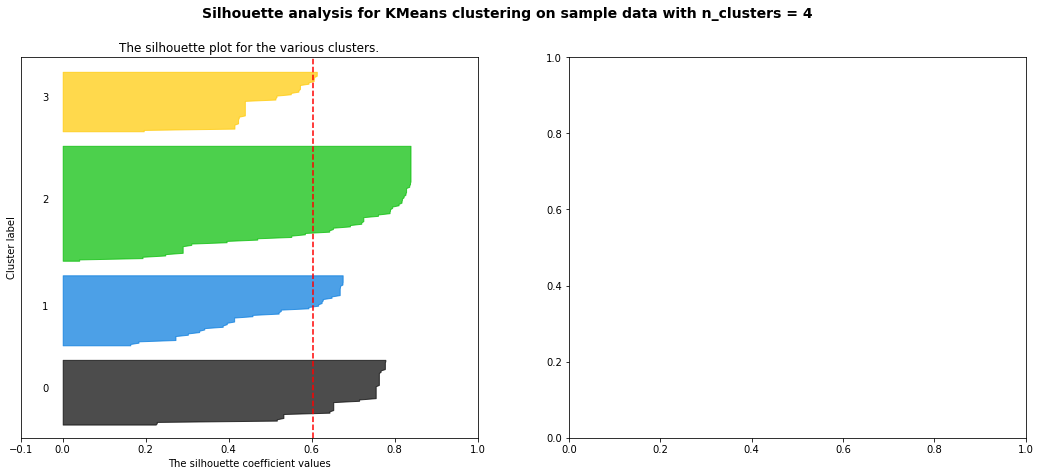

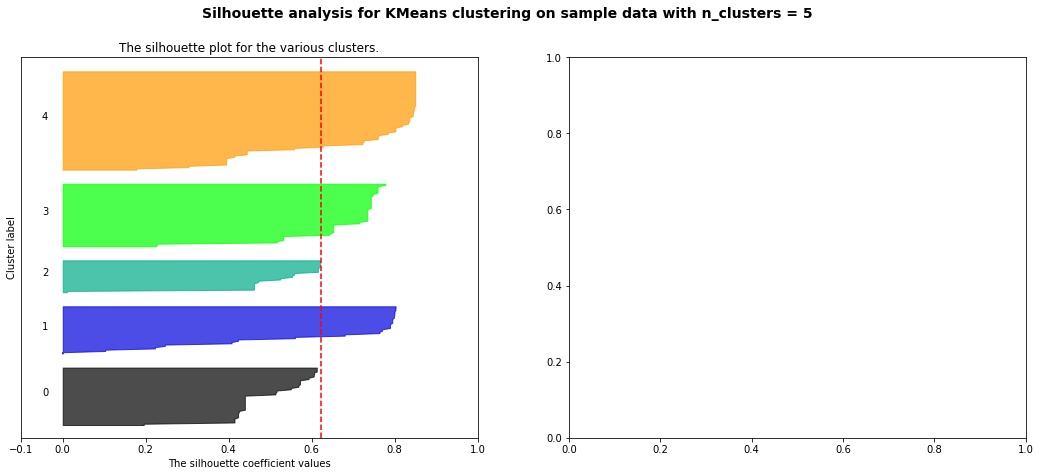

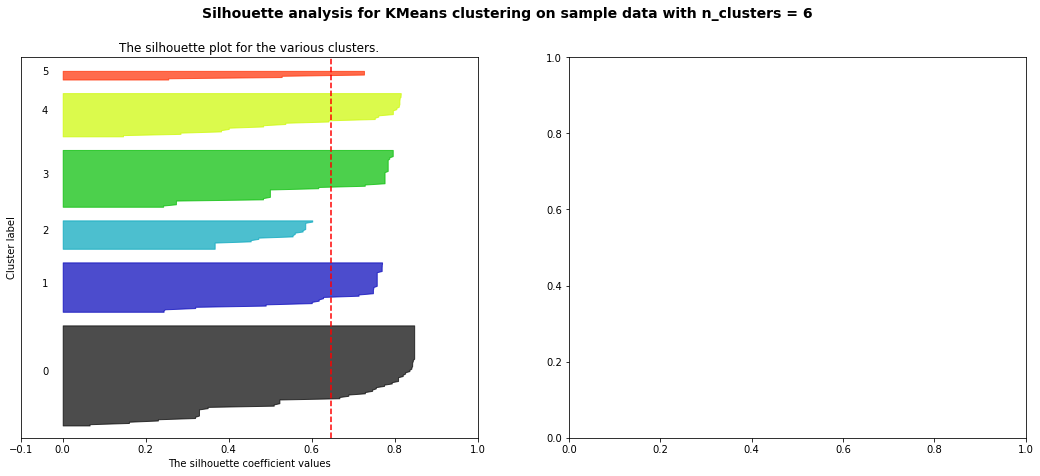

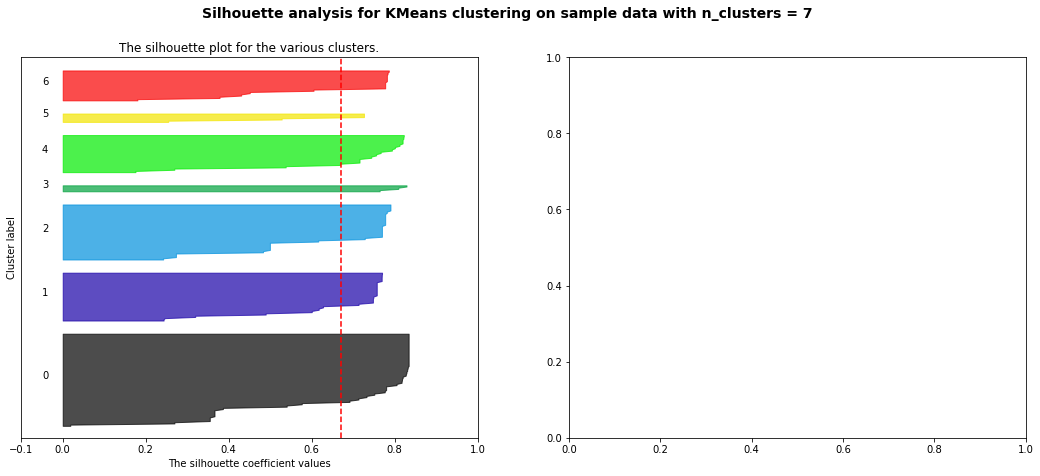

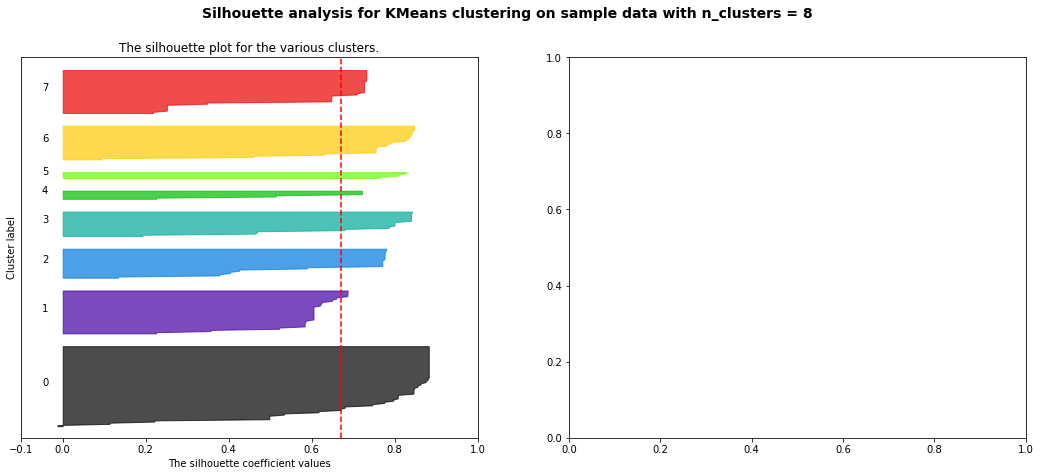

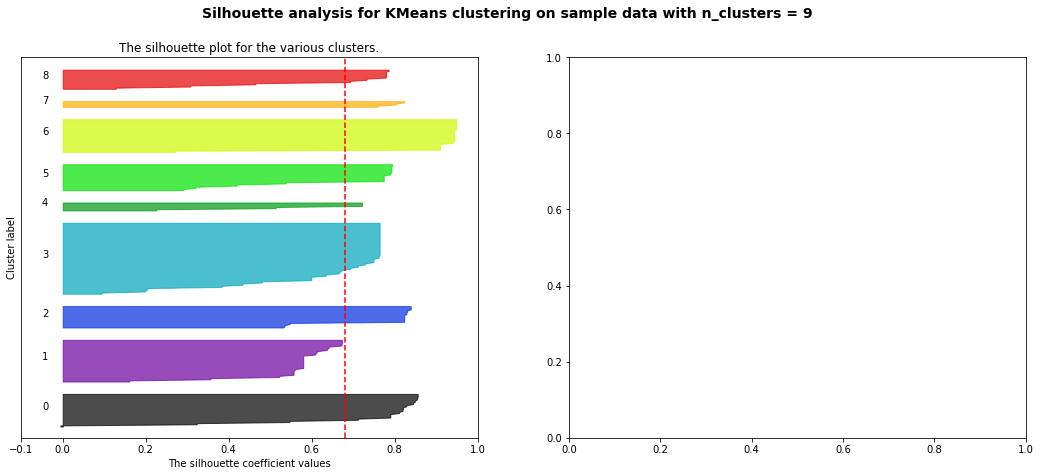

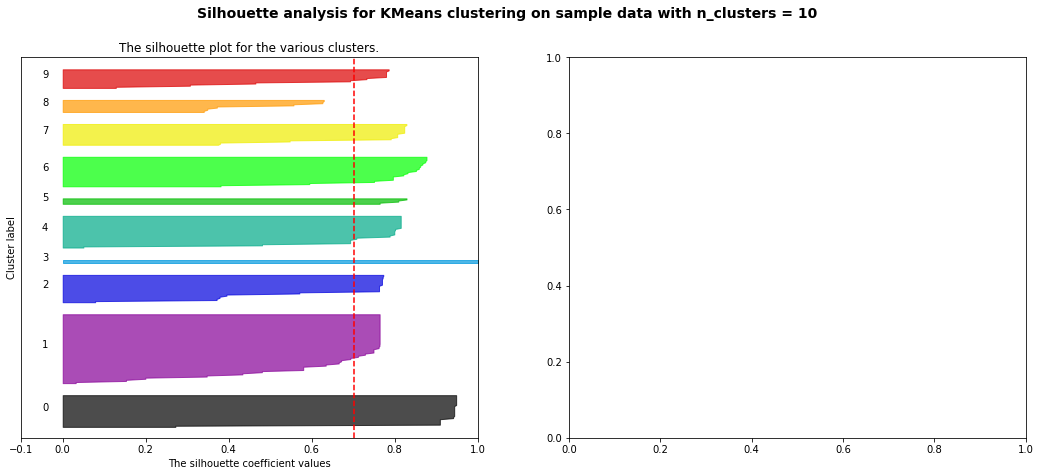

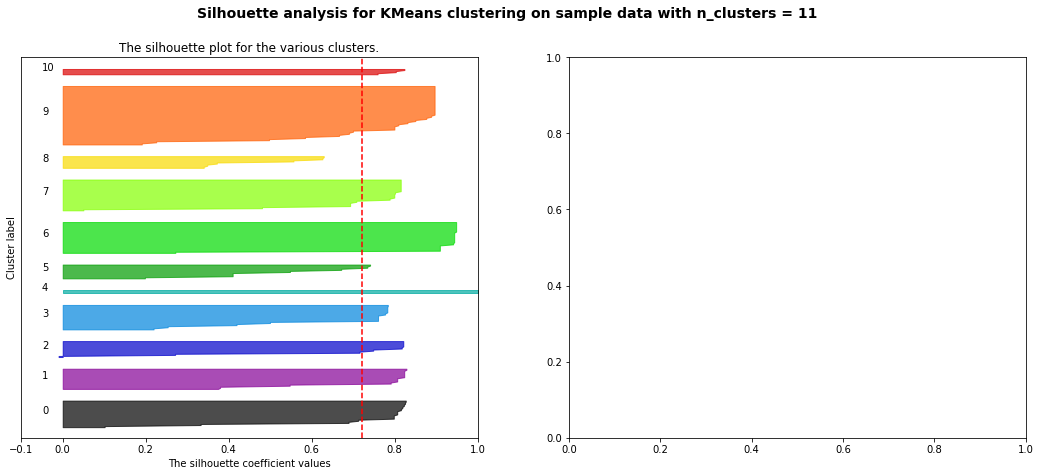

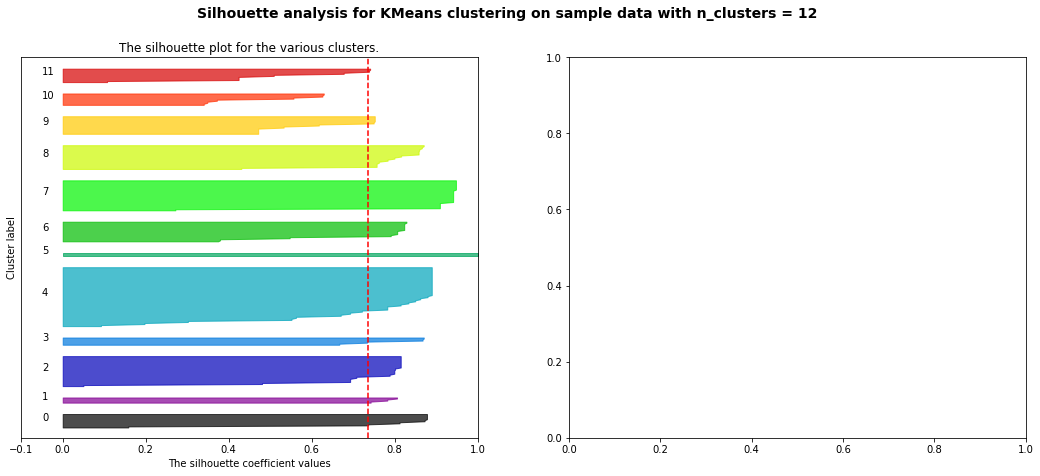

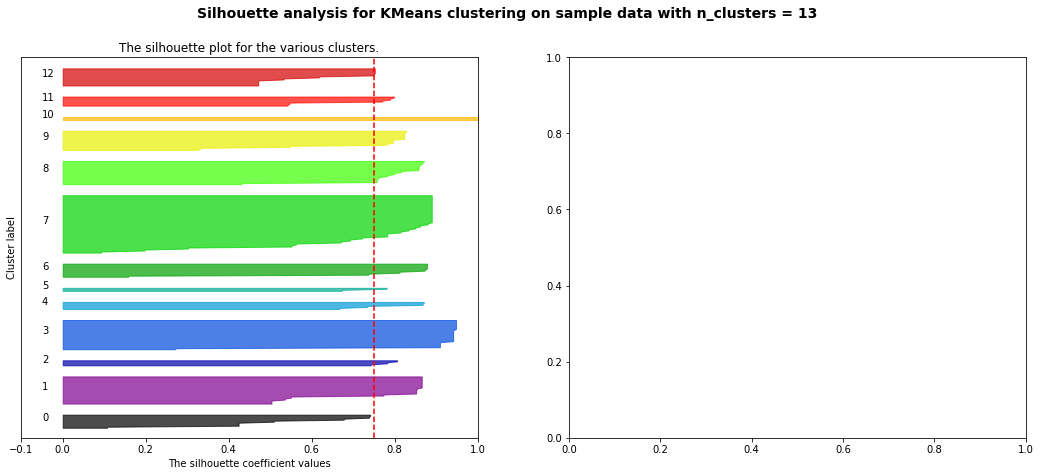

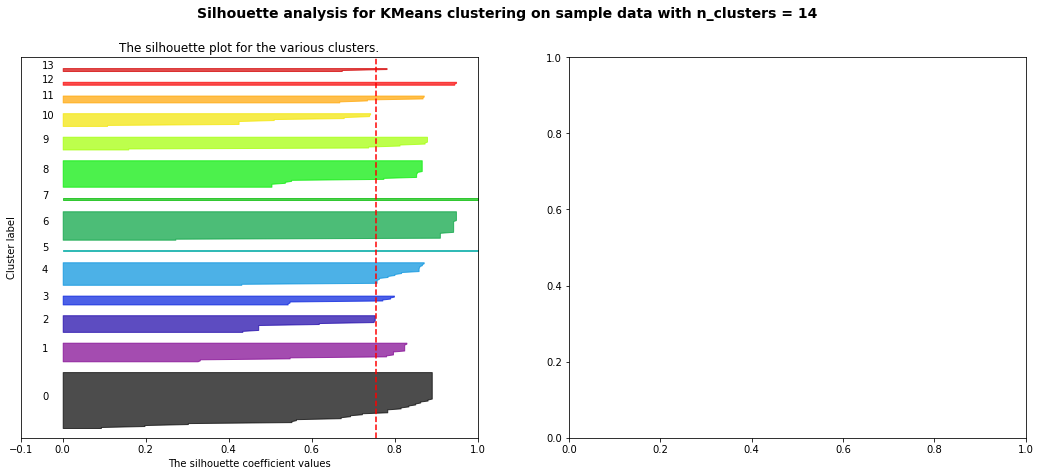

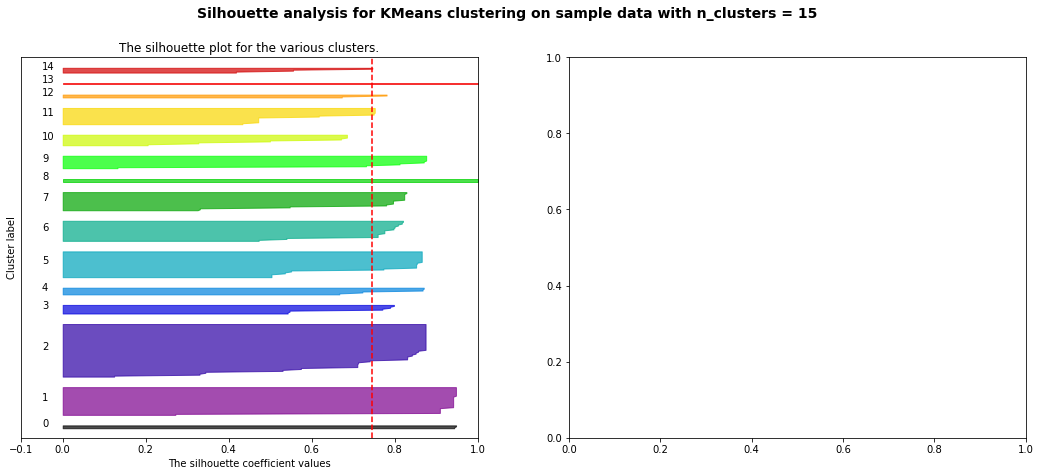

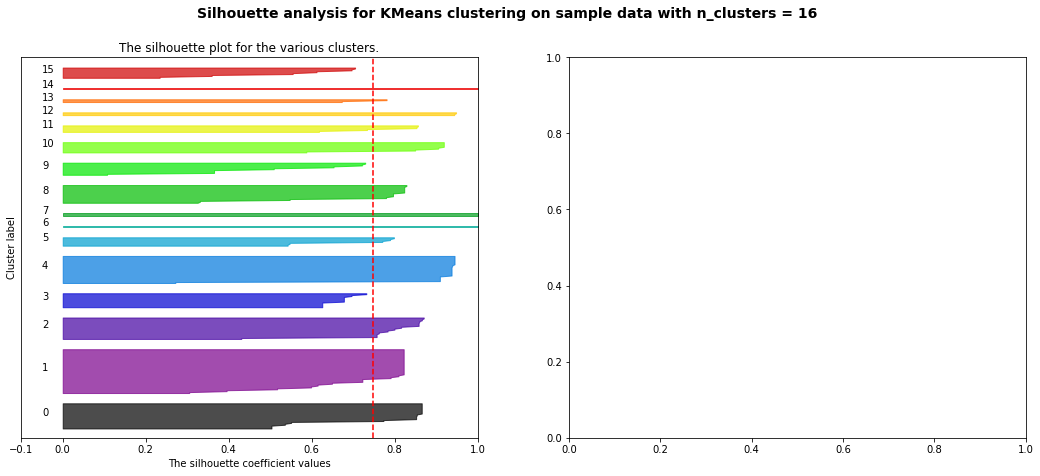

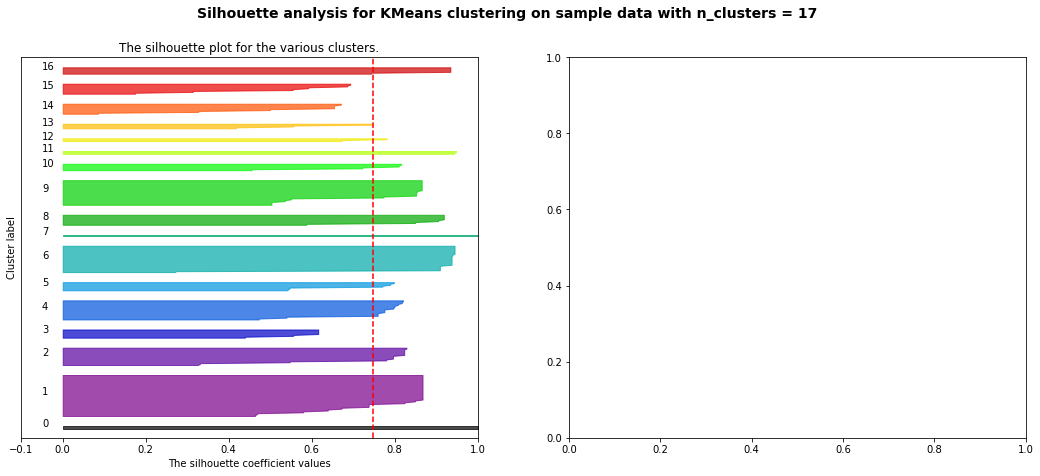

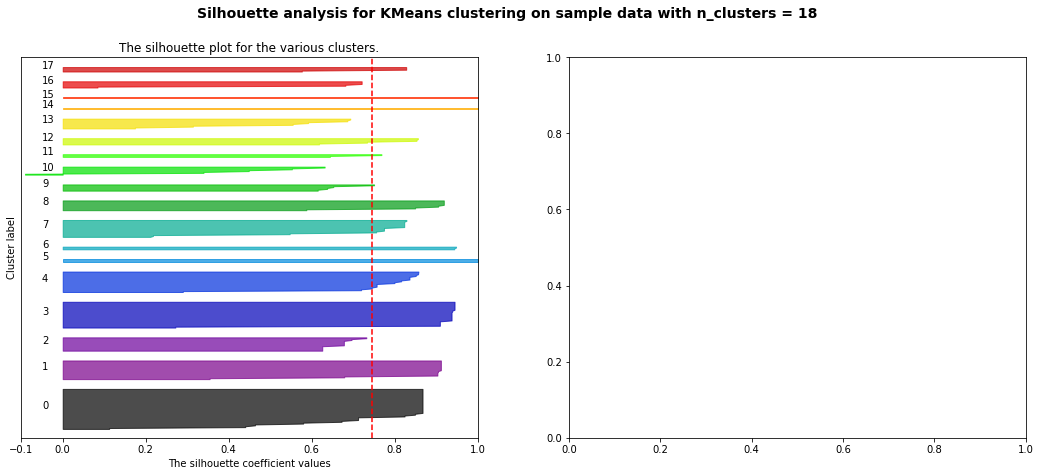

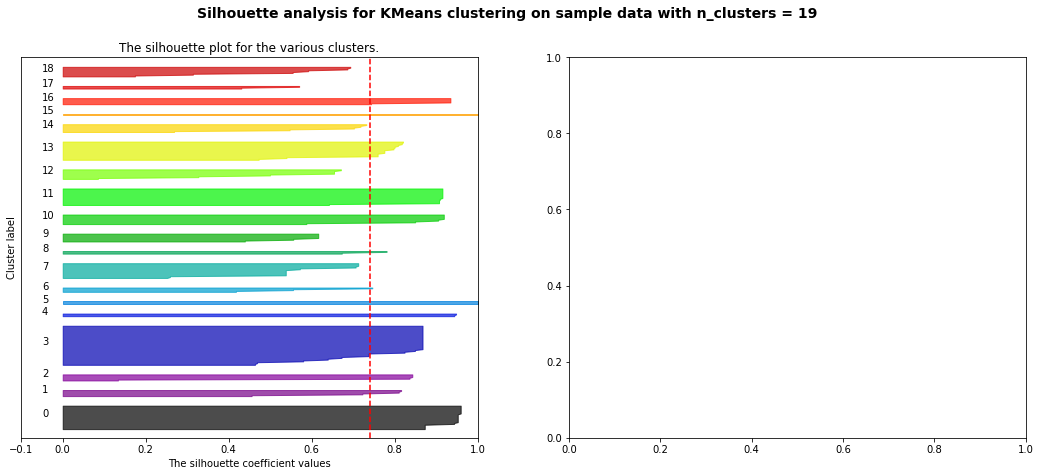

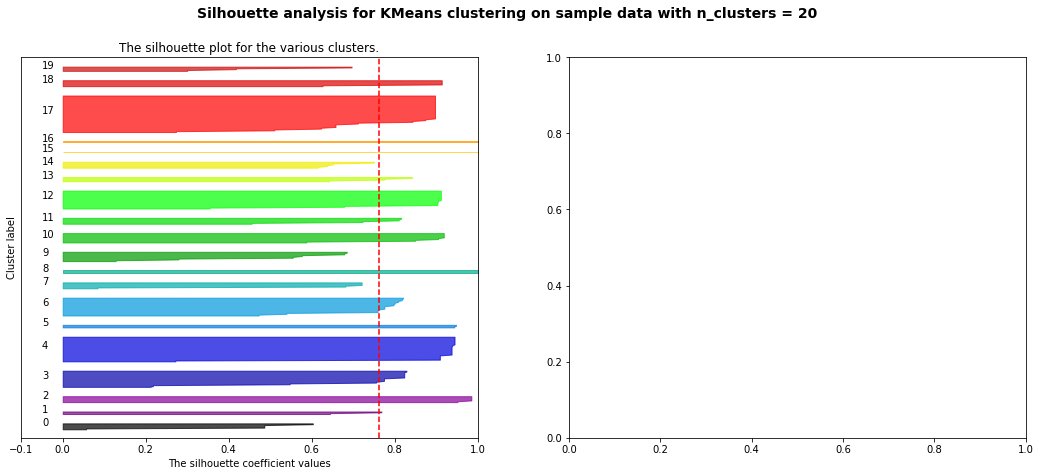

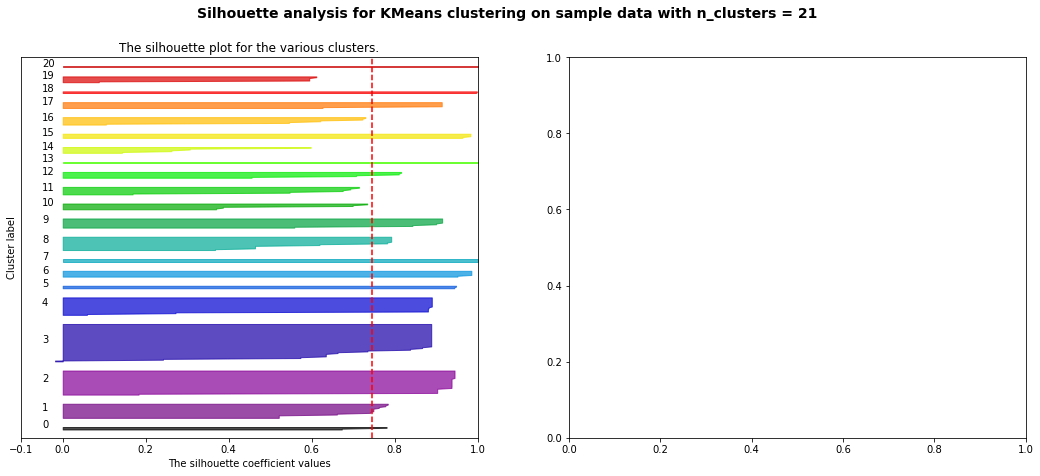

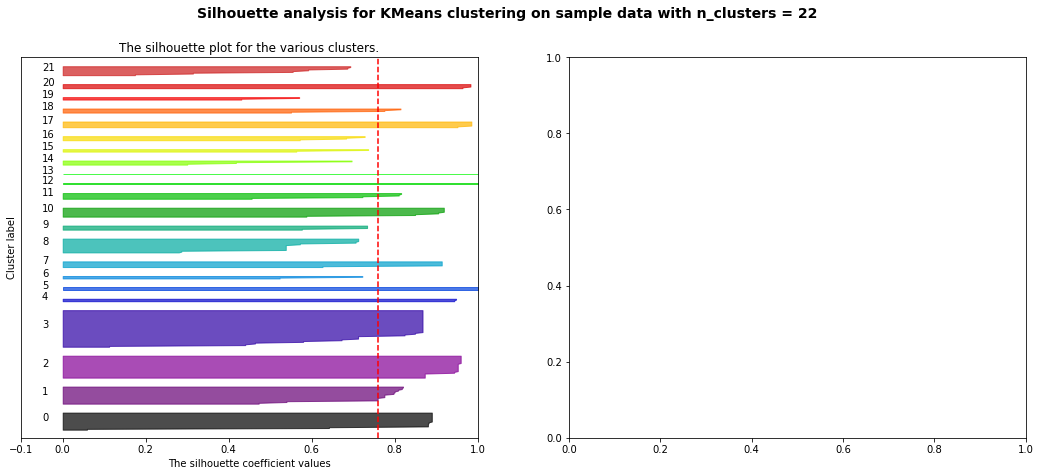

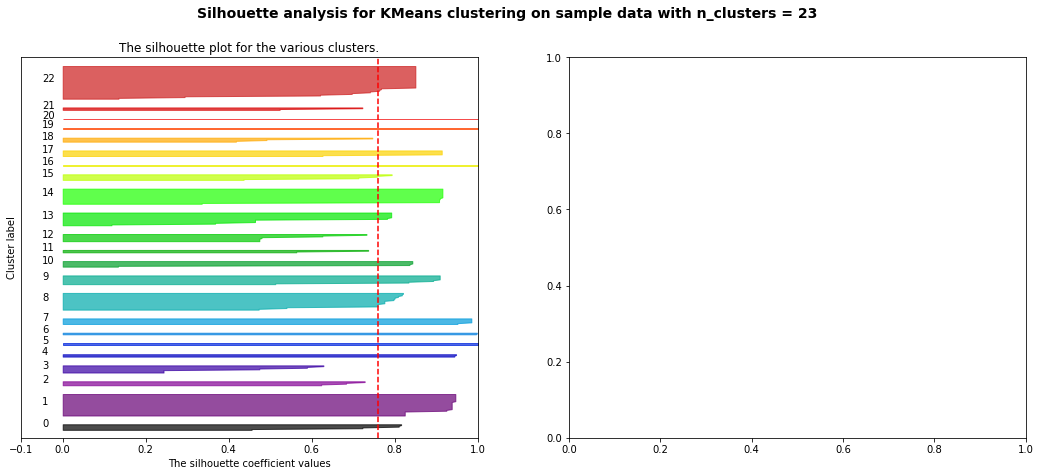

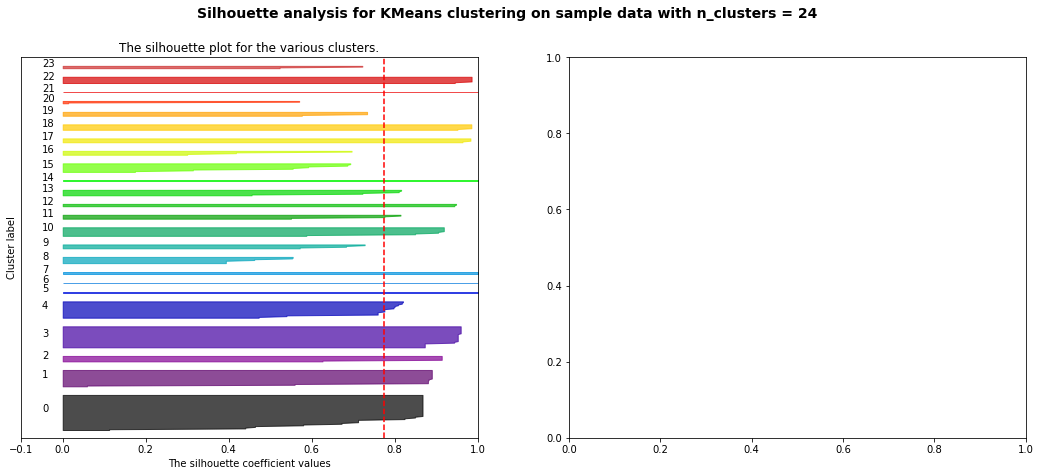

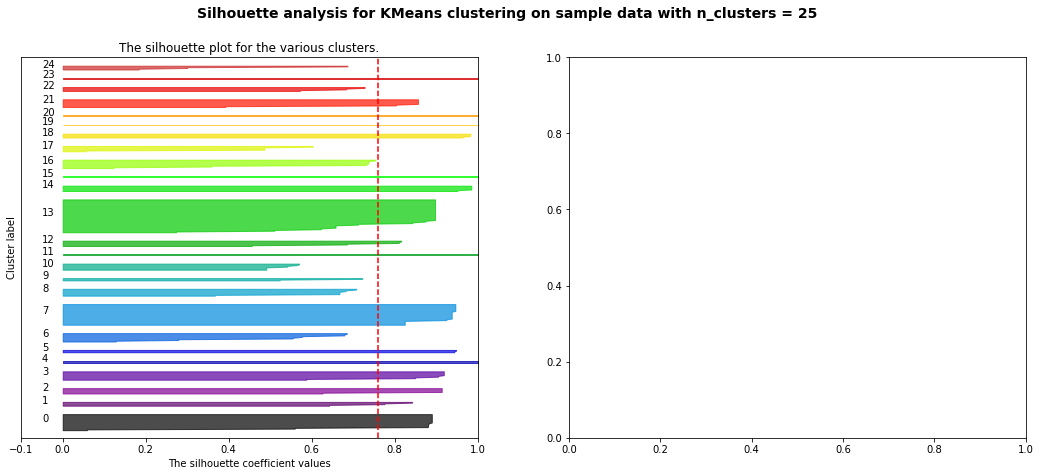

In [221]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(xscal) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(xscal)
    cluster_labels = clusterer.fit_predict(xscal)
   

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(xscal, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(xscal, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # Labeling the clusters
    centers = clusterer.cluster_centers_

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [222]:
kmeans = KMeans(n_clusters=13, random_state=10).fit(xscal)

In [223]:
sill_score_kmeans = silhouette_score(xscal,kmeans.labels_)
print(sill_score_kmeans)

0.7505505773372569


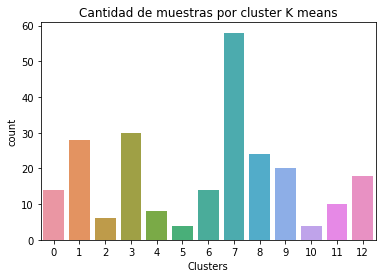

In [224]:
sns.countplot(kmeans.labels_)
plt.title("Cantidad de muestras por cluster K means")
plt.xlabel("Clusters")
plt.show()

In [225]:
hierclus = AgglomerativeClustering(n_clusters=13).fit(xscal)

In [226]:
hierclus.labels_

array([ 7,  7,  7,  7,  1,  1,  9,  9,  3,  3,  2,  2,  4,  4,  3,  3,  1,
        1,  7,  7,  9,  9,  2,  2,  2,  2,  2,  2,  1,  1,  4,  4, 12, 12,
        2,  2, 12, 12,  2,  2, 10, 10, 10, 10,  6,  6,  8,  8,  2,  2,  0,
        0,  4,  4,  6,  6,  4,  4,  7,  7,  2,  2,  2,  2,  1,  1, 11, 11,
        9,  9,  8,  8,  7,  7,  2,  2,  7,  7,  7,  7,  7,  7,  8,  8,  7,
        7,  2,  2,  4,  4,  8,  8,  9,  9,  4,  4,  9,  9,  6,  6,  9,  9,
        2,  2,  7,  7,  2,  2,  1,  1,  8,  8,  9,  9,  7,  7,  4,  4,  8,
        8,  3,  3,  3,  3,  2,  2,  0,  0,  5,  5,  0,  0,  2,  2, 10, 10,
        4,  4,  2,  2,  3,  3,  3,  3,  7,  7,  9,  9,  8,  8,  8,  8,  9,
        9,  2,  2,  7,  7,  2,  2,  2,  2,  4,  4,  8,  8, 12, 12,  1,  1,
       12, 12,  1,  1,  2,  2,  2,  2,  9,  9,  2,  2, 11, 11, 10, 10,  7,
        7,  8,  8,  9,  9,  2,  2,  1,  1,  8,  8,  2,  2,  3,  3,  2,  2,
        8,  8,  3,  3,  6,  6,  2,  2, 10, 10,  6,  6,  9,  9,  1,  1,  8,
        8,  4,  4,  5,  5

In [227]:
# Importamos librerias de Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
metrics.silhouette_score(xscal, hierclus.labels_, metric='euclidean')

0.7455562617737879

In [154]:
# Verificamos que kmeans funciona mejor que hierachical

In [257]:
y = gnc_2018.iloc[:,[12]] 
y.head()
kmeans = KMeans(n_clusters=13, random_state=10).fit(y)
sill_score_kmeans = silhouette_score(y,kmeans.labels_)
print(sill_score_kmeans)

0.7620653818750288


In [229]:
z = gnc_2019.iloc[:,[12]] 
scaler = preprocessing.StandardScaler().fit(z)
zscal = scaler.transform(z)
kmeans = KMeans(n_clusters=13, random_state=10).fit(zscal)
sill_score_kmeans = silhouette_score(zscal,kmeans.labels_)
print(sill_score_kmeans)

0.6732141317128169


In [230]:
xx = naftasuper_2017.iloc[:,[12]] 
scaler = preprocessing.StandardScaler().fit(xx)
xxscal = scaler.transform(xx)
kmeans = KMeans(n_clusters=13, random_state=10).fit(xxscal)
sill_score_kmeans = silhouette_score(xxscal,kmeans.labels_)
print(sill_score_kmeans)

0.6494452792125115


In [231]:
xx = naftasuper_2018.iloc[:,[12]] 
scaler = preprocessing.StandardScaler().fit(xx)
xxscal = scaler.transform(xx)
kmeans = KMeans(n_clusters=13, random_state=10).fit(xxscal)
sill_score_kmeans = silhouette_score(xxscal,kmeans.labels_)
print(sill_score_kmeans)

0.6542809768365071


In [232]:
xx = naftasuper_2019.iloc[:,[12]] 
scaler = preprocessing.StandardScaler().fit(xx)
xxscal = scaler.transform(xx)
kmeans = KMeans(n_clusters=13, random_state=10).fit(xxscal)
sill_score_kmeans = silhouette_score(xxscal,kmeans.labels_)
print(sill_score_kmeans)

0.5944923460730108


In [233]:
xx = gasoil_premium_2017.iloc[:,[12]] 
scaler = preprocessing.StandardScaler().fit(xx)
xxscal = scaler.transform(xx)
kmeans = KMeans(n_clusters=13, random_state=10).fit(xxscal)
sill_score_kmeans = silhouette_score(xxscal,kmeans.labels_)
print(sill_score_kmeans)

0.6661729955506528


In [240]:
xx = gasoil_premium_2018.iloc[:,[12]] 
scaler = preprocessing.StandardScaler().fit(xx)
xxscal = scaler.transform(xx)
kmeans = KMeans(n_clusters=13, random_state=10).fit(xxscal)
sill_score_kmeans = silhouette_score(xxscal,kmeans.labels_)
print(sill_score_kmeans)

0.5972012357938078


In [235]:
xx = gasoil_premium_2019.iloc[:,[12]] 
scaler = preprocessing.StandardScaler().fit(xx)
xxscal = scaler.transform(xx)
kmeans = KMeans(n_clusters=13, random_state=10).fit(xxscal)
sill_score_kmeans = silhouette_score(xxscal,kmeans.labels_)
print(sill_score_kmeans)

0.6133816061183062


In [246]:
# vemos cuales son las provincias
provincia = len(ps['provincia'].unique())
print("\n", ps['provincia'].unique())


 ['BUENOS AIRES' 'CHUBUT' 'SAN LUIS' 'SANTA FE' 'ENTRE RIOS' 'RIO NEGRO'
 'CHACO' 'SANTIAGO DEL ESTERO' 'MENDOZA' 'CORDOBA' 'SALTA' 'MISIONES'
 'TUCUMAN' 'CORRIENTES' 'LA PAMPA' 'LA RIOJA' 'CAPITAL FEDERAL'
 'SANTA CRUZ' 'CATAMARCA' 'NEUQUEN' 'JUJUY' 'FORMOSA' 'SAN JUAN'
 'TIERRA DEL FUEGO']


In [247]:
# podemos concluir que existen entre 13 y 16 cluster bien delimitados. Por otro lado, la división regional nos habla de: 
# 6 regiones y 24 provincias. Podría ser un indicio de que existen "regiones" reales distintas a las enumeradas